In [49]:
import pandas as pd
# Pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns

import warnings
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv('covid.csv')
print(type(df))
df.head()  # top 5 rows

<class 'pandas.core.frame.DataFrame'>


,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018
0,4/6/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
1,4/5/2020,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
2,4/4/2020,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
3,4/3/2020,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
4,4/2/2020,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0


In [52]:
df.shape
# num of rows = 9107
# num of cols = 10

(9107, 10)

In [53]:
df.columns

Index(['date', 'day', 'month', 'year', 'cases', 'deaths', 'countries', 'geoId',
       'countryterritoryCode', 'popData2018'],
      dtype='object')

In [54]:
df['month'].value_counts()

3     3815
1     2077
2     1943
4     1205
12      67
Name: month, dtype: int64

In [56]:
df['countries'].nunique()

205

In [58]:
df['geoId'].nunique()

204

In [60]:
print(df['countryterritoryCode'].nunique())
# df['countryterritoryCode'].value_counts()

200


In [62]:
r1 = df['month'].value_counts().reset_index()
r1

,index,month
0,3,3815
1,1,2077
2,2,1943
3,4,1205
4,12,67


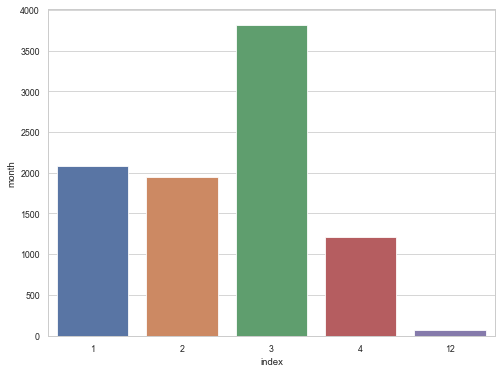

In [64]:
sns.barplot(data=r1,x='index',y='month')

#### Using Matplotlib with Seaborn

1) <b>xlabel() and ylabel()</b><br>
Used to label x-axis  and y-axis.

2) <b>title()</b><br>
Used to provide chart title

3) <b>show()</b><br>
Used to hide unecessary details

4) <b>xticks() and yticks()</b><br>
Used to change the ticks values. Also used to set rotation

5) <b>plt.figure(figsize=(x,y))</b><br>
Used to set the figure height and width    

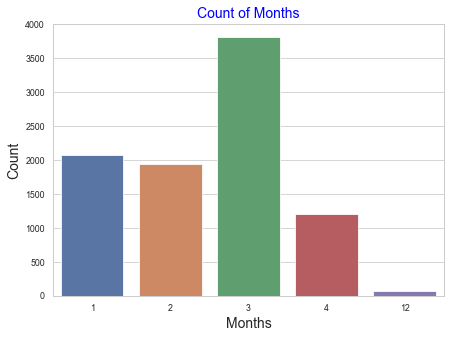

In [74]:
plt.figure(figsize=(7,5))
sns.barplot(data=r1,x='index',y='month')
plt.title('Count of Months',fontsize=14,color='blue')
plt.xlabel('Months',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

### Seaborn Chart Customization

<b>1) Figure Size</b>

sns.set(rc = {'figure.figsize':(height,width)}

rc = run command

#### Plot Country wise Population for top 7 countries with highest population

In [76]:
print(len(df['popData2018'].unique()))
print(len(df['countries'].unique()))

201
205


In [78]:
data = df[['countries','popData2018']]
data.duplicated().sum()

8902

In [79]:
data = data.drop_duplicates()

In [81]:
print(data.shape)
# num of rows = 205
# num of cols = 2

(205, 2)


In [82]:
data.head()

,countries,popData2018
0,Afghanistan,37172386.0
88,Albania,2866376.0
117,Andorra,77006.0
130,Algeria,42228429.0
234,Angola,30809762.0


In [84]:
top7_pop = data.sort_values('popData2018',ascending=False).head(7)
top7_pop

,countries,popData2018
1763,China,1.392730e+09
3820,India,1.352617e+09
8798,United_States_of_America,3.271674e+08
3917,Indonesia,2.676634e+08
6503,Pakistan,2.122150e+08
1187,Brazil,2.094693e+08
6130,Nigeria,1.958747e+08


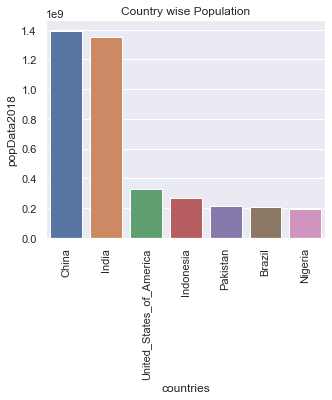

In [89]:
sns.set(rc={'figure.figsize':(5,4)})

sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.title('Country wise Population')
plt.xticks(rotation=90)
plt.show()

<b>2) Scaling</b>

Seaborn has four presets which set the size of the plot and allow you to customize your figure depending on how it will be presented.

In order of relative size they are: paper, notebook, talk, and poster

<b> 3) Styling</b><br>
    
We can set the style to white, whitegrid, darkgrid, dark

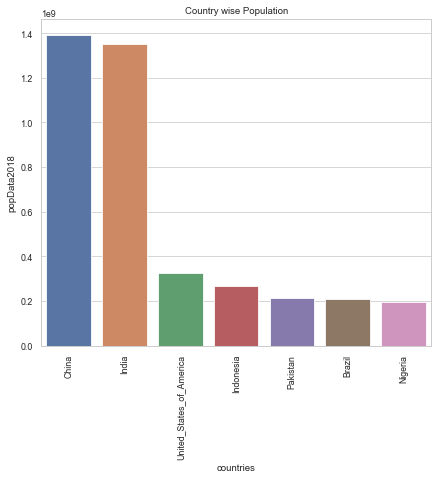

In [99]:
sns.set(rc={'figure.figsize':(7,6)})
sns.set_style('whitegrid')
sns.set_context("paper")
sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.title('Country wise Population')
plt.xticks(rotation=90)
plt.show()

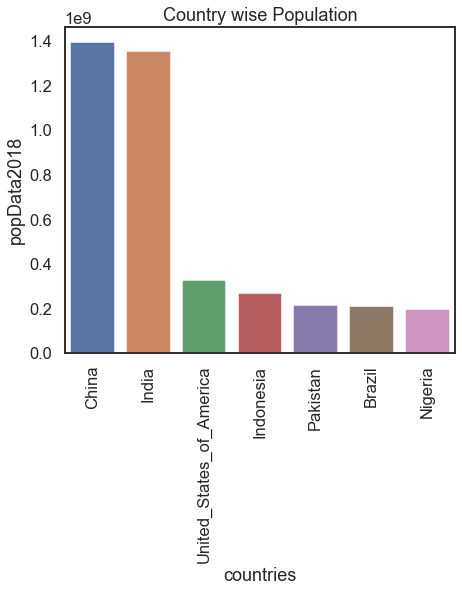

In [100]:
sns.set_style('white')
sns.set_context("talk")
sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.title('Country wise Population')
plt.xticks(rotation=90)
plt.show()

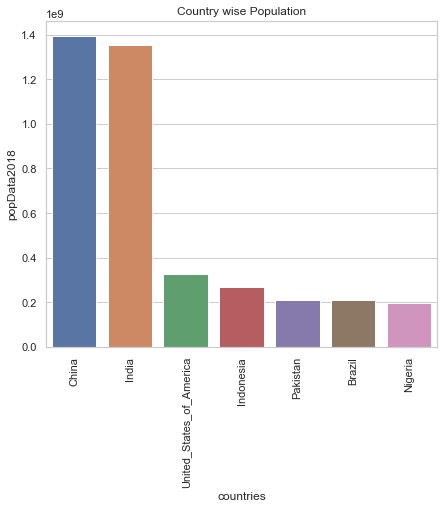

In [102]:
sns.set_style('whitegrid')
sns.set_context("notebook")
sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.title('Country wise Population')
plt.xticks(rotation=90)
plt.show()

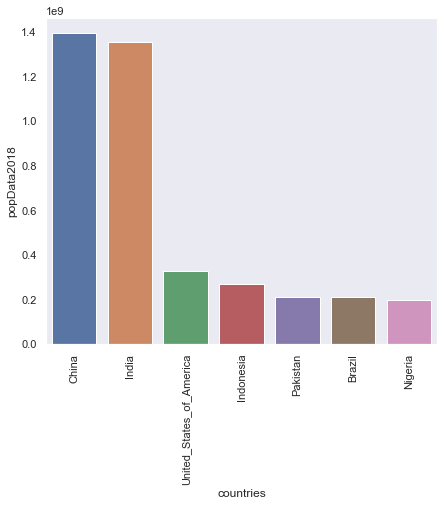

In [105]:
sns.set_style('dark')
sns.set_context("notebook")
sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.xticks(rotation=90)
plt.show()

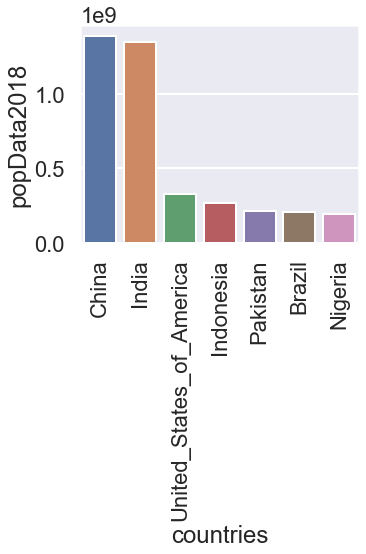

In [108]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style('darkgrid')
sns.set_context("poster")
sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.xticks(rotation=90)
plt.show()

<b> 4) Scaling Fonts and Line Widths</b><br>
Example<br>
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})


<b> 5) Styling</b><br>
    
We can set the style to white, whitegrid, darkgrid, dark

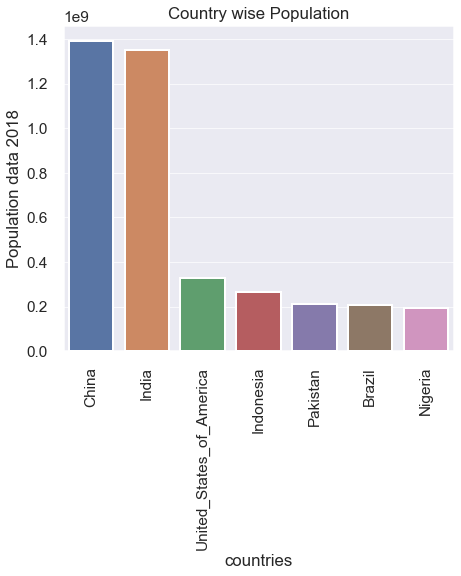

In [121]:
sns.set(rc={'figure.figsize':(7,6)})
sns.set_context("poster", font_scale = .7, rc={"grid.linewidth": 0.7})
sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.title('Country wise Population')
plt.ylabel('Population data 2018')
plt.xticks(rotation=90)
plt.show()

<b>6) Color_palette</b>

sns.color_palette()


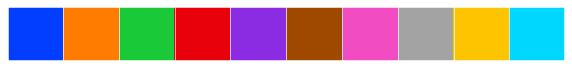

In [122]:
pal1 = sns.color_palette("bright")
sns.palplot(pal1) # paplette plot

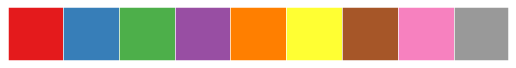

In [123]:
pal2 = sns.color_palette("Set1")  # Set2, Set3
sns.palplot(pal2)

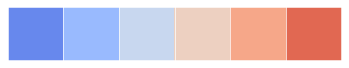

In [125]:
pal3 = sns.color_palette("coolwarm")
sns.palplot(pal3)

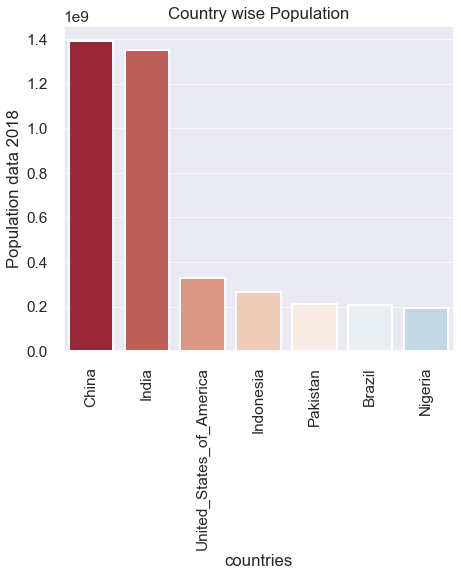

In [129]:
sns.set_palette("RdBu",10)
sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.title('Country wise Population')
plt.ylabel('Population data 2018')
plt.xticks(rotation=90)
plt.show()

#### 7) Spines
In addition to changing the color background, you can also define the usage of spines. Spines are the borders of the figure that contain the visualization. By default, an image has four spines.

You may want to remove some or all of the spines for various reasons. A figure with the left and bottom spines resembles traditional graphs. You can automatically take away the top and right spines using the sns.despine()function

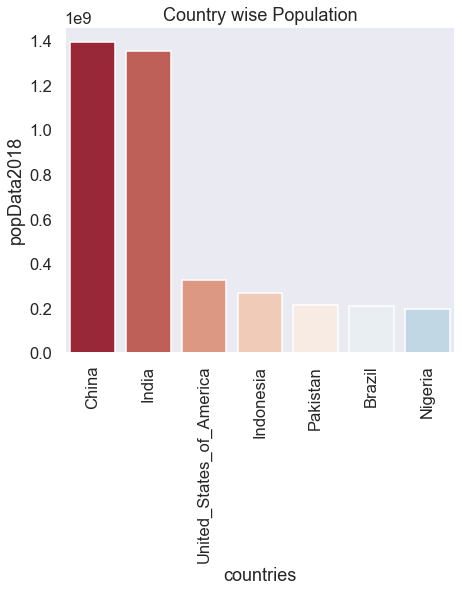

In [134]:
sns.set_style('dark')
# sns.set_context("talk")
sns.despine()
sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.title('Country wise Population')
plt.xticks(rotation=90)
plt.show()

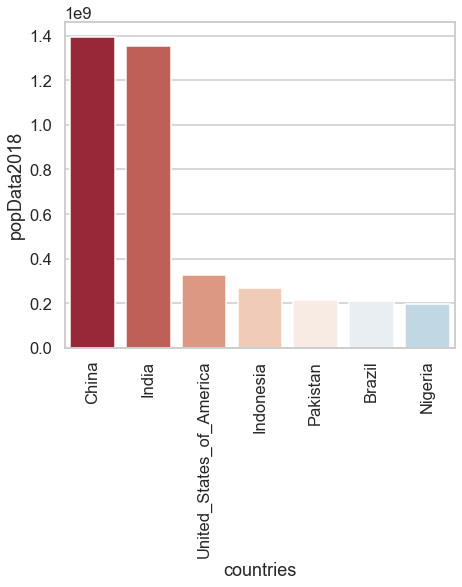

In [139]:
# sns.set_style("whitegrid")
sns.despine()
sns.barplot(data=top7_pop, x='countries',y='popData2018')
plt.xticks(rotation=90)
plt.show()

#### Multiple Plots

In [140]:
df_3c = df[df['countries'].isin(['India','Russia','Belgium'])]
df_3c.shape

(288, 10)

In [141]:
df_3c.head(4)

,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018
951,4/6/2020,6,4,2020,1260,164,Belgium,BE,BEL,11422068.0
952,4/5/2020,5,4,2020,1661,140,Belgium,BE,BEL,11422068.0
953,4/4/2020,4,4,2020,1422,132,Belgium,BE,BEL,11422068.0
954,4/3/2020,3,4,2020,1384,183,Belgium,BE,BEL,11422068.0


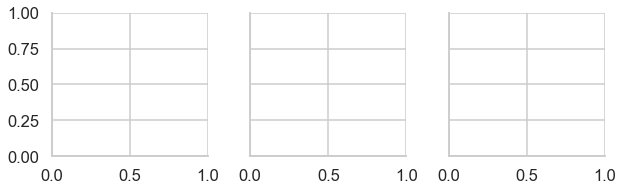

In [143]:
sea = sns.FacetGrid(df_3c, col = "countries")

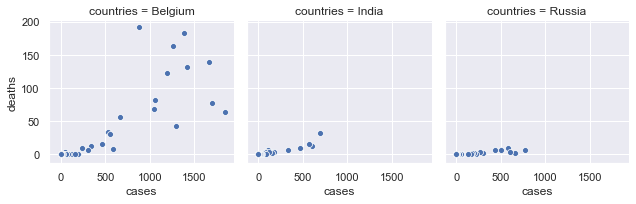

In [145]:
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style('darkgrid')
sns.set_context("notebook")
sea = sns.FacetGrid(df_3c, col = "countries")
sea.map(sns.scatterplot, "cases", "deaths")
plt.show()

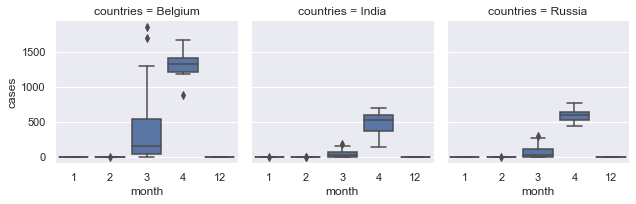

In [146]:
sea = sns.FacetGrid(df_3c, col = "countries")
sea.map(sns.boxplot, 'month','cases')
plt.show()